**Import Libraries**

In [46]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D , MaxPooling2D , Dense , Flatten , Dropout

**Import Data**

In [47]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [48]:
train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')

**Define the class labels**

In [49]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]


**Visual the Data**

Label for the image is:  A


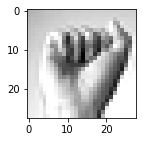

In [50]:
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28)), cmap='gray') 
print("Label for the image is: ", class_names[int(train_data[i,0])])

**Data Distribution**

Text(0.5, 1.0, 'Label')

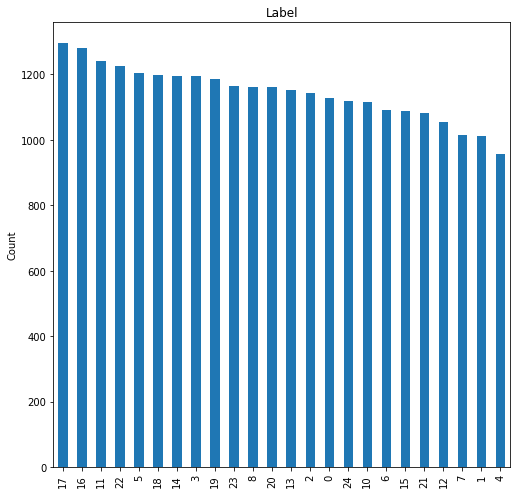

In [51]:
fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')


**Normalize the data**

In [52]:
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

**Convert into categorical**

In [53]:
y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

In [54]:
y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

**Shape the input f0r NN**

In [55]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [56]:
print(X_train.shape)
print(X_test.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [57]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(25, activation = 'softmax'))

model.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['acc'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)        

**Plot the Accuracy**

In [58]:
history = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 27s 122ms/step - loss: 2.9889 - acc: 0.1025 - val_loss: 1.4085 - val_acc: 0.5502
Epoch 2/10
215/215 [==============================] - 26s 121ms/step - loss: 1.2428 - acc: 0.5784 - val_loss: 0.8174 - val_acc: 0.7190
Epoch 3/10
215/215 [==============================] - 26s 120ms/step - loss: 0.6992 - acc: 0.7654 - val_loss: 0.5759 - val_acc: 0.7889
Epoch 4/10
215/215 [==============================] - 26s 120ms/step - loss: 0.4627 - acc: 0.8396 - val_loss: 0.3844 - val_acc: 0.8703
Epoch 5/10
215/215 [==============================] - 26s 120ms/step - loss: 0.3076 - acc: 0.8951 - val_loss: 0.3035 - val_acc: 0.8957
Epoch 6/10
215/215 [==============================] - 26s 122ms/step - loss: 0.2199 - acc: 0.9283 - val_loss: 0.2861 - val_acc: 0.9123
Epoch 7/10
215/215 [==============================] - 26s 119ms/step - loss: 0.1668 - acc: 0.9434 - val_loss: 0.2953 - val_acc: 0.9122
Epoch 8/10
215/215 [==============================] - 2

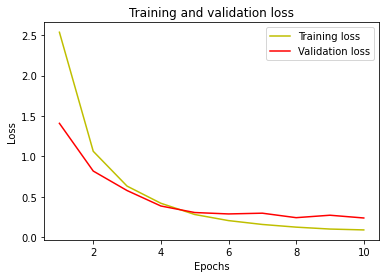

In [59]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [60]:
acc = history.history['acc']
val_acc = history.history['val_acc']

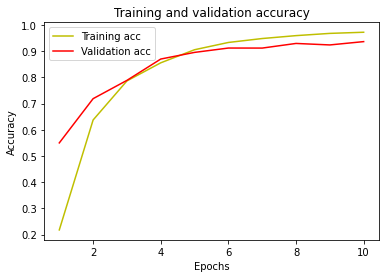

In [61]:
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
prediction = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [63]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
print('Accuracy Score = ', accuracy)

Accuracy Score =  0.9368377021751255


Predicted Label:  E
True Label:  E


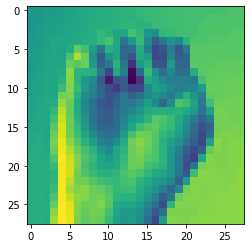

In [64]:
i = random.randint(1,len(prediction))
plt.imshow(X_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

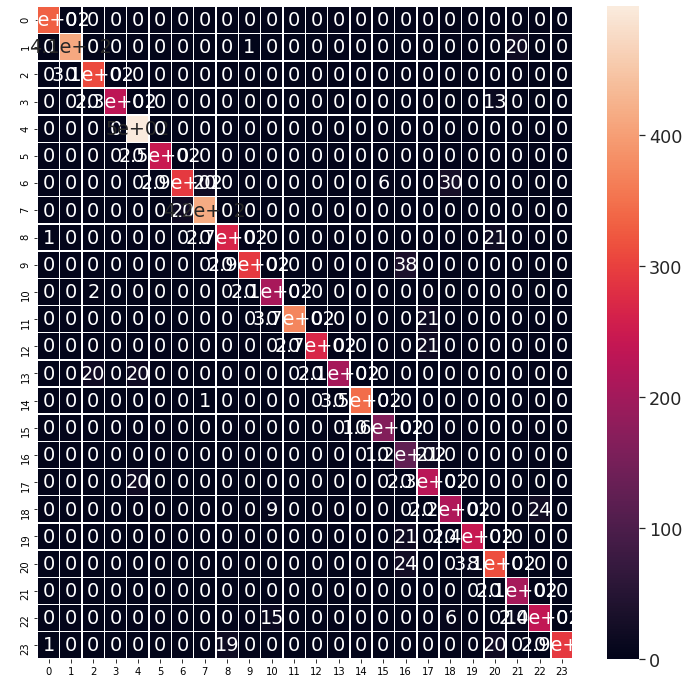

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, prediction)
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

([<matplotlib.axis.XTick at 0x7f1346766910>,
 [Text(0, 0, 'A'),
  Text(0, 0, 'B'),
  Text(0, 0, 'C'),
  Text(0, 0, 'D'),
  Text(0, 0, 'E'),
  Text(0, 0, 'F'),
  Text(0, 0, 'G'),
  Text(0, 0, 'H'),
  Text(0, 0, 'I'),
  Text(0, 0, 'J'),
  Text(0, 0, 'K'),
  Text(0, 0, 'L'),
  Text(0, 0, 'M'),
  Text(0, 0, 'N'),
  Text(0, 0, 'O'),
  Text(0, 0, 'P'),
  Text(0, 0, 'Q'),
  Text(0, 0, 'R'),
  Text(0, 0, 'S'),
  Text(0, 0, 'T'),
  Text(0, 0, 'U'),
  Text(0, 0, 'V'),
  Text(0, 0, 'W'),
  Text(0, 0, 'X')])

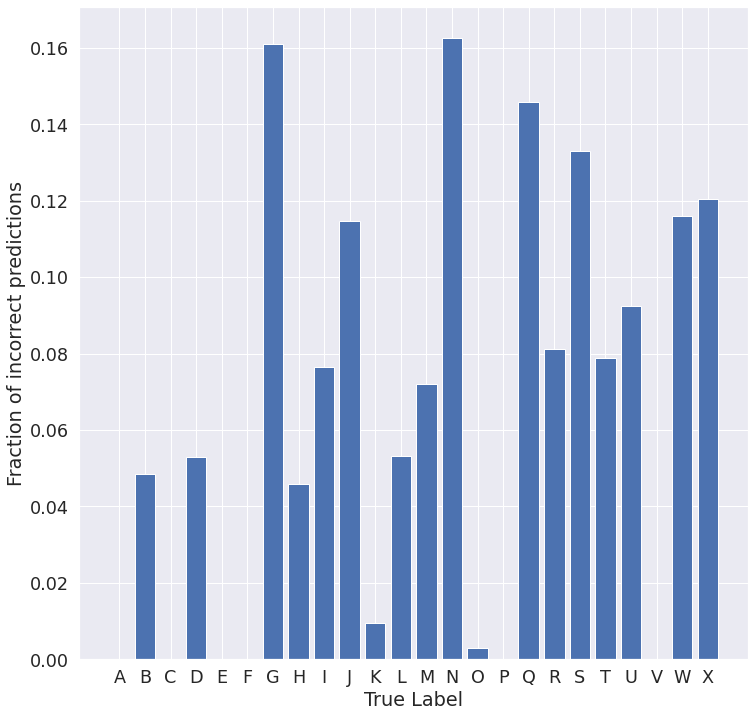

In [66]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(24), class_names) 
